## 한글문서 내 단어 빈도수 분석 및 워드클라우드로 시각
1. 한글 문서에서 명사만 추출 : koNLPy 라이브러리 활용
1. 명사에 대한 빈도수 분석 : collections.Counter 활용 (built-in)
1. 상위 빈도수 명사에 대해서 워드클라우드 생성 : WordCloud 라이브러리 활용

### koNLPy 라이브러리 설치
1. 설치 기본 사항 확인 : 윈도우 비트 수, 파이썬 버전, JDK (1.7 이상)
2. 환경변수의 시스템 변수 설정 : JAVA_HOME = JDK 설치된 경로

In [1]:
!python -m pip install --upgrade konlpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
     ------------------------------------- 345.1/345.1 kB 10.8 MB/s eta 0:00:00


### WordCloud 라이브러리 설치

In [4]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 152.1/152.1 kB 8.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# 1. 데이터 준비
1. 데이터 로딩 (파이썬 객체로)
1. 분석할 데이터 추출 및 정제
1. 명사 데이터만 추출

### 1-1. 파일 읽기 (json 파일을 파이썬 객체로 로딩하기) : json.load

In [8]:
import json
filename = "한가위_news.json"
with open(filename, "r", encoding="utf-8") as infile:
    data = json.load(infile)
data

[{'index': 1,
  'title': '최지우 딸 떡잎부터 다르네, 3살인데 벌써 완성형 미모',
  'description': '지난 9월 29일 최지우는 자신의 소셜네트워크서비스 계정에 “풍성한 <b>한가위</b> 보내세요”라는 문구와 함께 사진을 게재했다. 사진에는 최지우의 3세 딸이 한복을 입고 카메라를 향해 포즈를 취한 모습이 그려졌다. 특히... ',
  'link': 'https://n.news.naver.com/mnews/article/609/0000778330?sid=106',
  'orgLink': 'https://www.newsen.com/news_view.php?uid=202310041606220510',
  'pubDate': '2023-10-04 16:09:00'},
 {'index': 2,
  'title': '(재)서산장학재단, 서산·태안에 큰 희망을 심다',
  'description': '성일종 국회의원은 &quot;오늘 콘서트는 <b>한가위</b>만큼이나 풍성하고 감동을 전한 무대였다&quot;며, &quot;앞으로 우리 서산.태안에서 이런 뜻 깊은 무대가 자주 만들어질 수 있도록, 국회에서 지원을 아끼지 않을 것&quot;이라고 말했다.... ',
  'link': 'https://www.ccdailynews.com/news/articleView.html?idxno=2231400',
  'orgLink': 'https://www.ccdailynews.com/news/articleView.html?idxno=2231400',
  'pubDate': '2023-10-04 16:02:00'},
 {'index': 3,
  'title': '정조테마공연장 개관...무예24기 등 각종 공연 (B tv 수원뉴스)',
  'description': '또 유명한 기획공연도 유치해서 정조테마공연장이 수원화성 관광의 한 축이 되도록 만들어갈 계획입니다.&quot; 정조테마공연장은 <b>한가위</b> 특별 공연을 시작으로 연중 상시 관람

### 1-2. 분석할 데이터 추출 및 정제
* re : regular expression
  - re.sub(matching_pattern, replace_string, target_string)
  
 https://wikidocs.net/4308

In [9]:
#json 데이터 중 본문에 해당하는 부분을 가져와서 정제한 후 통합하기
import re

total_result = ''
for item in data:
    clean_data = re.sub(r'[\W]', ' ', item['description'])
    total_result += clean_data
total_result

'지난 9월 29일 최지우는 자신의 소셜네트워크서비스 계정에  풍성한  b 한가위  b  보내세요 라는 문구와 함께 사진을 게재했다  사진에는 최지우의 3세 딸이 한복을 입고 카메라를 향해 포즈를 취한 모습이 그려졌다  특히    성일종 국회의원은  quot 오늘 콘서트는  b 한가위  b 만큼이나 풍성하고 감동을 전한 무대였다 quot 며   quot 앞으로 우리 서산 태안에서 이런 뜻 깊은 무대가 자주 만들어질 수 있도록  국회에서 지원을 아끼지 않을 것 quot 이라고 말했다     또 유명한 기획공연도 유치해서 정조테마공연장이 수원화성 관광의 한 축이 되도록 만들어갈 계획입니다  quot  정조테마공연장은  b 한가위  b  특별 공연을 시작으로 연중 상시 관람객을 맞을 예정입니다  B tv 뉴스 조윤주입니다 레만한인회는   b 한가위  b  답게 교민들이 함께 모여 음식을 나눠 먹는 행사를  취리휘 한인회는 스위스에 사는 한국 작가들의 북콘서트를 진행했다  코로나 팬더믹 이후 한류코리아의 행사를 비롯해 교민사회의 활동도    류성걸 의원의 지역구인 동구갑에는 배기철 전 동구청장이  보름달처럼 풍성한  b 한가위  b  되세요 라는 현수막을    김기현 대표 특별보좌역을 맡고 있는 정해용 전 대구시 경제부시장은  온가족과 함께 풍성한  b 한가위  b 되세요     b 한가위  b  대표축제인 마산만날제는 고려 시대부터 전해 내려오는 모녀간의 애틋한 상봉 설화를 바탕으로 하고    이번 행사는 30일  b 한가위  b  음악회를 시작으로 3일간 만날 제단  제의 마당  공연무대  민속마당 등이     b 한가위  b  대잔치 논현 노래자랑  나도 가수다  에 참석했다  우측 앞줄 첫번째 이새날 의원  서울특별시의회 교육위원회 이새날 의원 국민의힘  강남1 은  quot 지난 22일 강남구 논현동에 위치한 삼익아트홀에서 열린   b 한가위  b     긴  b 한가위  b  연휴에 미뤘던 많은 일들 쌓여 있기는 일반 직장이나 우리 정치권 역시 마찬가지입니

### 1-3. 품사 태깅 : 명사 추출
* koNLPy 내 Okt 라이브러리 활용

https://konlpy.org/en/latest/

In [10]:
from konlpy.tag import Okt
okt = Okt()
total_result_noun = okt.nouns(total_result)
total_result_noun

['지난',
 '최지우',
 '자신',
 '소셜네트워크서비스',
 '계정',
 '한가위',
 '문구',
 '사진',
 '게재',
 '사진',
 '최지우',
 '세',
 '딸',
 '한복',
 '카메라',
 '향',
 '포즈',
 '취한',
 '모습',
 '일종',
 '국회의원',
 '오늘',
 '콘서트',
 '한가위',
 '감동',
 '전',
 '무대',
 '며',
 '앞',
 '우리',
 '서산',
 '태안',
 '뜻',
 '무대',
 '자주',
 '수',
 '국회',
 '지원',
 '것',
 '말',
 '또',
 '기획',
 '공연',
 '정조',
 '테마',
 '공연',
 '수원화성',
 '관광',
 '축',
 '만',
 '계획',
 '정조',
 '테마',
 '공연장',
 '한가위',
 '특별',
 '공연',
 '시작',
 '연중',
 '상시',
 '관람객',
 '예정',
 '뉴스',
 '윤주',
 '레만',
 '한인',
 '회',
 '한가위',
 '답',
 '교민',
 '음식',
 '행사',
 '취리휘',
 '한인',
 '회',
 '스위스',
 '한국',
 '작가',
 '북',
 '콘서트',
 '진행',
 '코로나',
 '팬더믹',
 '이후',
 '한류',
 '코리아',
 '행사',
 '비롯',
 '교민',
 '사회',
 '활동',
 '류성걸',
 '의원',
 '지역구',
 '갑',
 '배기',
 '철',
 '전',
 '동구청',
 '보름달',
 '한가위',
 '현수막',
 '김기현',
 '대표',
 '특별',
 '보좌',
 '역',
 '정해',
 '용',
 '전',
 '대구시',
 '부시장',
 '가족',
 '한가위',
 '한가위',
 '대표',
 '축제',
 '마산',
 '만날',
 '제',
 '고려',
 '시대',
 '전해',
 '모녀',
 '상봉',
 '설화',
 '바탕',
 '이번',
 '행사',
 '한가위',
 '음악회',
 '시작',
 '만날',
 '제단',
 '제의',
 '마당',
 '연무대',
 '민속',
 '마당',
 '등',
 '한가

## 2. 데이터 탐색 및 분석

### 2-1. 단어 빈도 탐색 : collections.Counter
* from collections import Counter
   - *counterObject* = **Counter**(*pyObject*)
       - 데이터 집합에서 개수를 자동으로 계산
   - *counterObject*.**most_common**(*number*)
       - 빈도수가 높은 상위 number개의 데이터만 추출

https://docs.python.org/3/library/collections.html#collections.Counter

In [11]:
from collections import Counter
count = Counter(total_result_noun)
count

Counter({'지난': 92,
         '최지우': 19,
         '자신': 10,
         '소셜네트워크서비스': 1,
         '계정': 1,
         '한가위': 1203,
         '문구': 2,
         '사진': 63,
         '게재': 10,
         '세': 16,
         '딸': 15,
         '한복': 31,
         '카메라': 3,
         '향': 15,
         '포즈': 3,
         '취한': 1,
         '모습': 66,
         '일종': 3,
         '국회의원': 7,
         '오늘': 34,
         '콘서트': 39,
         '감동': 31,
         '전': 96,
         '무대': 33,
         '며': 89,
         '앞': 51,
         '우리': 76,
         '서산': 8,
         '태안': 3,
         '뜻': 14,
         '자주': 3,
         '수': 161,
         '국회': 4,
         '지원': 15,
         '것': 104,
         '말': 87,
         '또': 43,
         '기획': 11,
         '공연': 137,
         '정조': 2,
         '테마': 8,
         '수원화성': 2,
         '관광': 18,
         '축': 1,
         '만': 47,
         '계획': 5,
         '공연장': 1,
         '특별': 45,
         '시작': 40,
         '연중': 2,
         '상시': 1,
         '관람객': 16,
         '예정': 9,
     

## 2-2. 데이터 분석에 활용할 데이터 추출

In [14]:
# 출현 횟수가 많은 상위 80개의 단어 중에서 단어길이가 1보다 큰 것만 추출
number = 80
word_count = dict()
for word, counts in count.most_common(number):
    if len(word) > 1:
        word_count[word] = counts
word_count

{'한가위': 1203,
 '추석': 501,
 '연휴': 329,
 '명절': 258,
 '행사': 175,
 '가족': 157,
 '마당': 142,
 '공연': 137,
 '시민': 121,
 '마음': 110,
 '체험': 104,
 '이번': 99,
 '지난': 92,
 '전통': 89,
 '오후': 87,
 '맞이': 84,
 '서울': 84,
 '한국': 83,
 '보름달': 77,
 '항저우': 77,
 '우리': 76,
 '진행': 76,
 '민족': 74,
 '방송': 74,
 '축제': 73,
 '국민': 72,
 '만들기': 72,
 '시간': 70,
 '위해': 67,
 '이벤트': 67,
 '모습': 66,
 '통해': 65,
 '사진': 63,
 '박물관': 63,
 '여러분': 62,
 '윷놀이': 62,
 '운현궁': 62,
 '경기': 59,
 '대통령': 58,
 '모두': 57,
 '게임': 57,
 '종로구': 57,
 '센터': 56,
 '기간': 56,
 '선물': 56,
 '인천': 55,
 '인사': 54,
 '대한민국': 53,
 '활쏘기': 53,
 '투호': 52,
 '방문': 51,
 '지역': 51,
 '음식': 50,
 '민속': 50,
 '특집': 50,
 '아시안': 49,
 '대표': 48,
 '이웃': 48,
 '풍요': 48,
 '진성': 48,
 '지난달': 47,
 '나눔': 47,
 '문화': 47,
 '제기차기': 47,
 '기자': 46}

# 3. 시각화
## 3-1. 워드클라우드 : WordCloud
1. wordcloud 객체 생성 : *wordcloudObject* = **WordCloud**(*font_path*, *optional_parameters*)
1. 빈도기반으로 wordcloud 이미지 생성 : *wordcloudObject* = *wordcloudObject*.**generate_from_frequencies**(*frequencies[, …]*)
1. matplotlib.pyplot으로 시각화
    1. (생략가능) 특정 option으로 figure 생성 : *plt*.**figure**(*optional parameters*)
    1. 빈도수 기반의 wordcloud 객체를 입력으로 image 생성 : *plt*.**imshow**(*array-like data*)
    1. 축이 보이지 않도록 off : *plt*.**axis**('off')
    1. plt.show()
1. 생성한 wordcloud 이미지를 파일로 저장 : *wordcloudObject*.**to_file**(*filename*)

https://amueller.github.io/word_cloud/index.html

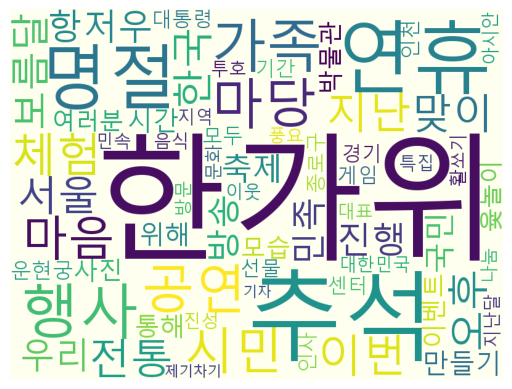

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "C:\Windows\Fonts\malgun.ttf"
wordcloud = WordCloud(font_path, background_color="ivory", width=800, height=600)
wordcloud_freq = wordcloud.generate_from_frequencies(word_count)

plt.imshow(wordcloud_freq)
plt.axis('off')
plt.show()